In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns

digits = load_digits()

In [23]:
# Print to show there are 1797 images (8 by 8 images for a dimensionality of 64)
print("Image Data Shape" , digits.data.shape)

# Print to show there are 1797 labels (integers from 0-9)
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


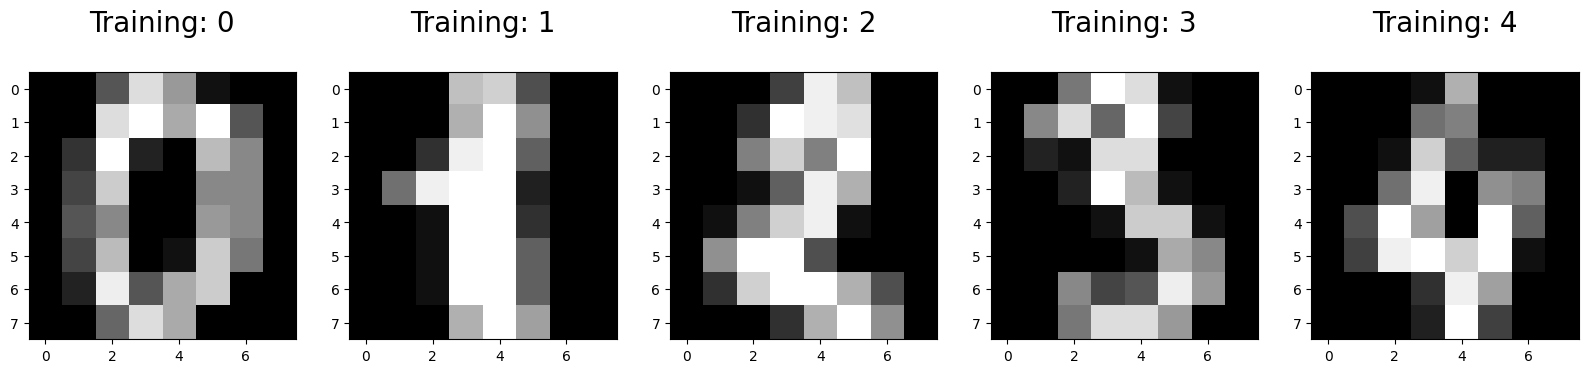

In [24]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

In [25]:
# Create X and y independent and dependent variables
X, y = digits.data, digits.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

"""It is important to split the data into training and test sets because the training set allows our model to learn to 
recognise written digits and their corresponding labels and then the test set tests our model on digits it has never seen
before and the performance of this determines how well our model might perform in real-world applications where it encounters
new handwritten digits.
"""

# Create a random forest classifier and train it with the data
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [26]:
# Define the parameter grid
param_grid = {
    'n_estimators': [10, 50, 100, 200, 300]
}

# Use GridSearchCV to find the best parameter
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameter
best_n_estimators = grid_search.best_params_['n_estimators']

# Train the model with the best parameter
best_rf = RandomForestClassifier(n_estimators=best_n_estimators, random_state=42)
best_rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

We want to tune the `n_estimators` parameter which is the number of trees in the forest. This is because any change in this parameter will affect the **model performance** and **computational efficiency**; too many or too little trees can lead to overfitting and underfitting respectively and too many trees will increase the training and prediction time of the model. We have optimised the performance of our model by changing `n_estimators` to 200.

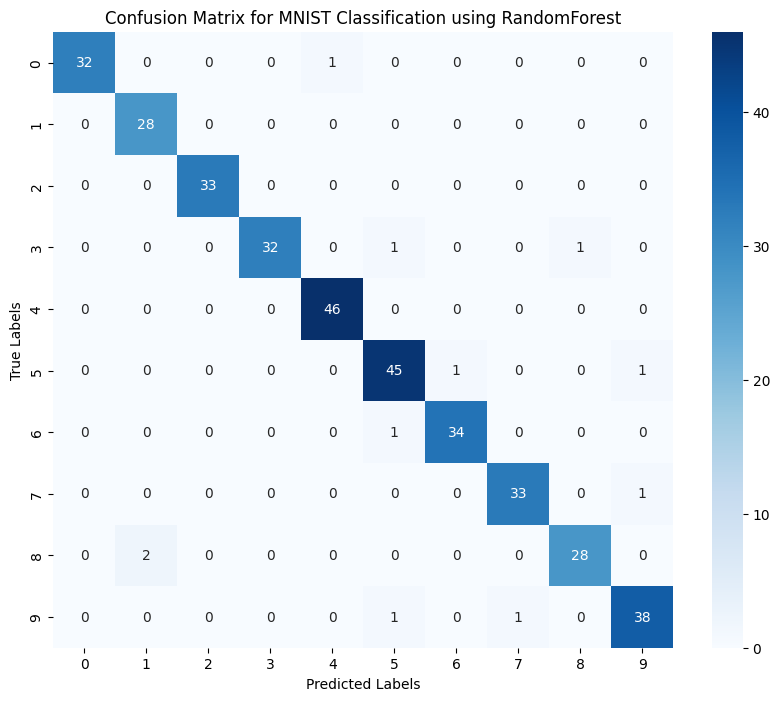

In [28]:
# Predict the test set
y_pred = best_rf.predict(X_test)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualise the confusion matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for MNIST Classification using RandomForest')
plt.show()

From our confusion matrix above we can see that our model struggled with the number **5** the most, sometimes seeing it as a **3**, **6** or **9** instead.

In [34]:
# Compute the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test set accuracy: {accuracy}")

# Generate the classification report
class_report = classification_report(y_test, y_pred, digits=4)
print(class_report) # Using print function for better formatting

Test set accuracy: 0.9694444444444444
              precision    recall  f1-score   support

           0     1.0000    0.9697    0.9846        33
           1     0.9333    1.0000    0.9655        28
           2     1.0000    1.0000    1.0000        33
           3     1.0000    0.9412    0.9697        34
           4     0.9787    1.0000    0.9892        46
           5     0.9375    0.9574    0.9474        47
           6     0.9714    0.9714    0.9714        35
           7     0.9706    0.9706    0.9706        34
           8     0.9655    0.9333    0.9492        30
           9     0.9500    0.9500    0.9500        40

    accuracy                         0.9694       360
   macro avg     0.9707    0.9694    0.9698       360
weighted avg     0.9700    0.9694    0.9695       360

